In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
Acc_df = pd.read_csv('../Accident_Information.csv')
Vel_df = pd.read_csv('../Vehicle_Information.csv', encoding = "ISO-8859-1")

C:\Users\edsen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
Accident_Index                      object
Age_Band_of_Driver                  object
Age_of_Vehicle                      float64
Driver_Home_Area_Type               object
Driver_IMD_Decile                   float64
Engine_Capacity_.CC.                float64
Hit_Object_in_Carriageway           object
Hit_Object_off_Carriageway          object
Journey_Purpose_of_Driver           object
Junction_Location                   object
make                                object
model                               object
Propulsion_Code                     object
Sex_of_Driver                       object
Skidding_and_Overturning            object
Towing_and_Articulation             object
Vehicle_Leaving_Carriageway         object
Vehicle_Location.Restricted_Lane    float64
Vehicle_Manoeuvre                   object
Vehicle_Reference                   int64
Vehicle_Type            

In [4]:
Acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
Accident_Index                                 object
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OS

In [5]:
threshold = 10000

vc = Vel_df["make"].value_counts()
vals_to_remove = vc[vc <= threshold].index.values
Vel_df["make"].loc[Vel_df["make"].isin(vals_to_remove)] = None

Vel_df.dropna



C:\Users\edsen\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<bound method DataFrame.dropna of         Accident_Index            Age_Band_of_Driver  Age_of_Vehicle  \
0        200401BS00001                       26 - 35             3.0   
1        200401BS00002                       26 - 35             NaN   
2        200401BS00003                       26 - 35             4.0   
3        200401BS00003                       66 - 75             NaN   
4        200401BS00004                       26 - 35             1.0   
5        200401BS00004                       36 - 45            10.0   
6        200401BS00009                       26 - 35             NaN   
7        200401BS00010                       36 - 45             NaN   
8        200401BS00012                       46 - 55             3.0   
9        200401BS00013                       26 - 35             4.0   
10       200401BS00013                       21 - 25             3.0   
11       200401BS00021                       36 - 45             2.0   
12       200401BS00022        

In [6]:
Vel_df["make"].value_counts()

VAUXHALL            239650
FORD                237084
PEUGEOT             126533
VOLKSWAGEN          120820
RENAULT             114300
HONDA               103165
MERCEDES             89891
TOYOTA               83597
CITROEN              81787
NISSAN               71265
BMW                  68194
FIAT                 59739
VOLVO                59440
AUDI                 51349
SUZUKI               42266
ROVER                34591
YAMAHA               28349
SKODA                28113
LAND ROVER           24036
HYUNDAI              22819
MAZDA                22803
SEAT                 21761
MITSUBISHI           21187
KIA                  18800
DENNIS               18694
SCANIA               18670
MINI                 16138
KAWASAKI             15436
DAF TRUCKS           13114
PIAGGIO              11400
LONDON TAXIS INT     10306
MAN                  10095
Name: make, dtype: int64

In [7]:
Vel_df.head()

Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
0  200401BS00001            26 - 35             3.0   
1  200401BS00002            26 - 35             NaN   
2  200401BS00003            26 - 35             4.0   
3  200401BS00003            66 - 75             NaN   
4  200401BS00004            26 - 35             1.0   

          Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC.  \
0                    Urban area                4.0                1588.0   
1                    Urban area                3.0                   NaN   
2  Data missing or out of range                NaN                 998.0   
3  Data missing or out of range                NaN                   NaN   
4                    Urban area                4.0                 124.0   

  Hit_Object_in_Carriageway Hit_Object_off_Carriageway  \
0                      None                       None   
1                      None                       None   
2                      None                       None   
3                      None                       None   
4                      None                       None   

      Journey_Purpose_of_Driver             Junction_Location  ...   \
0  Data missing or out of range  Data missing or out of range  ...    
1  Data missing or out of range  Data missing or out of range  ...    
2  Data missing or out of range  Data missing or out of range  ...    
3  Data missing or out of range  Data missing or out of range  ...    
4  Data missing or out of range  Data missing or out of range  ...    

  Skidding_and_Overturning Towing_and_Articulation  \
0                     None     No tow/articulation   
1                     None     No tow/articulation   
2                     None     No tow/articulation   
3                     None     No tow/articulation   
4                     None     No tow/articulation   

  Vehicle_Leaving_Carriageway Vehicle_Location.Restricted_Lane  \
0   Did not leave carriageway                              0.0   
1   Did not leave carriageway                              0.0   
2   Did not leave carriageway                              0.0   
3   Did not leave carriageway                              0.0   
4   Did not leave carriageway                              0.0   

   Vehicle_Manoeuvre Vehicle_Reference                Vehicle_Type  \
0  Going ahead other                 2                         109   
1  Going ahead other                 1                         109   
2      Turning right                 1                         109   
3  Going ahead other                 2                         109   
4  Going ahead other                 1  Motorcycle 125cc and under   

    Was_Vehicle_Left_Hand_Drive X1st_Point_of_Impact  Year  
0  Data missing or out of range                Front  2004  
1  Data missing or out of range                Front  2004  
2  Data missing or out of range                Front  2004  
3  Data missing or out of range                Front  2004  
4  Data missing or out of range                Front  2004  

[5 rows x 24 columns]

In [8]:
Acc_df.head()

Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                None  2005-01-04   
1              0.0            Slight                None  2005-01-05   
2              0.0            Slight                None  2005-01-06   
3              0.0            Slight                None  2005-01-07   
4              0.0            Slight                None  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident    ...      \
0     Tuesday                                          1.0    ...       
1   Wednesday                                          1.0    ...       
2    Thursday                                          1.0    ...       
3      Friday                                          1.0    ...       
4      Monday                                          1.0    ...       

          Police_Force Road_Surface_Conditions           Road_Type  \
0  Metropolitan Police             Wet or damp  Single carriageway   
1  Metropolitan Police                     Dry    Dual carriageway   
2  Metropolitan Police                     Dry  Single carriageway   
3  Metropolitan Police                     Dry  Single carriageway   
4  Metropolitan Police             Wet or damp  Single carriageway   

  Special_Conditions_at_Site Speed_limit   Time  Urban_or_Rural_Area  \
0                       None        30.0  17:42                Urban   
1                       None        30.0  17:36                Urban   
2                       None        30.0  00:15                Urban   
3                       None        30.0  10:35                Urban   
4                       None        30.0  21:13                Urban   

      Weather_Conditions  Year InScotland  
0  Raining no high winds  2005         No  
1     Fine no high winds  2005         No  
2     Fine no high winds  2005         No  
3     Fine no high winds  2005         No  
4     Fine no high winds  2005         No  

[5 rows x 34 columns]

In [9]:
Acc_df.set_index('Accident_Index')


1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
Accident_Index                                                  
200501BS00001               A           3218.0            NaN   
200501BS00002               B            450.0              C   
200501BS00003               C              0.0            NaN   
200501BS00004               A           3220.0            NaN   
200501BS00005    Unclassified              0.0            NaN   
200501BS00006    Unclassified              0.0            NaN   
200501BS00007               C              0.0   Unclassified   
200501BS00009               A            315.0            NaN   
200501BS00010               A           3212.0              B   
200501BS00011               B            450.0              C   
200501BS00012               A              4.0              B   
200501BS00014               A           3220.0              A   
200501BS00015    Unclassified              0.0              A   
200501BS00016               A           3217.0              A   
200501BS00017               A              4.0            NaN   
200501BS00018               A           3217.0   Unclassified   
200501BS00019    Unclassified              0.0   Unclassified   
200501BS00020               A           3218.0              A   
200501BS00021               B            302.0            NaN   
200501BS00022               A              4.0   Unclassified   
200501BS00023    Unclassified              0.0            NaN   
200501BS00024               B            415.0              C   
200501BS00025               A           3220.0              A   
200501BS00028               C              0.0   Unclassified   
200501BS00029               A              4.0              B   
200501BS00031               C              0.0   Unclassified   
200501BS00032               B            450.0            NaN   
200501BS00033               A           3220.0              A   
200501BS70001               A              4.0              C   
200501BS70002               B            319.0   Unclassified   
...                       ...              ...            ...   
2017984114417            A(M)             74.0            NaN   
2017984114517               B            722.0            NaN   
2017984114917               A              7.0   Unclassified   
2017984115017               A            708.0            NaN   
2017984115117            A(M)             74.0            NaN   
2017984115617               B            721.0            NaN   
2017984115817            A(M)             74.0            NaN   
2017984116917               A             75.0            NaN   
2017984117017            A(M)             74.0            NaN   
2017984117217               B           7076.0            NaN   
2017984117417    Unclassified            906.0   Unclassified   
2017984117917               A            701.0            NaN   
2017984118017               C             35.0            NaN   
2017984118117               B            721.0              B   
2017984118317               A              7.0            NaN   
2017984118417            A(M)             74.0            NaN   
2017984118617               B           7076.0            NaN   
2017984118717            A(M)             74.0            NaN   
2017984118817               B           7076.0            NaN   
2017984118917            A(M)             74.0            NaN   
2017984119017               B           6357.0            NaN   
2017984119217               A            701.0            NaN   
2017984119917            A(M)             74.0            NaN   
2017984120017               A            709.0            NaN   
2017984120717               B           6357.0              B   
2017984121017            A(M)             74.0            NaN   
2017984121217               C             69.0            NaN   
2017984121717            A(M)             74.0   Unclassified   
2017984122317               A            708.0    

In [10]:
Vel_df.set_index('Accident_Index')

Age_Band_of_Driver  Age_of_Vehicle  \
Accident_Index                                                 
200401BS00001                        26 - 35             3.0   
200401BS00002                        26 - 35             NaN   
200401BS00003                        26 - 35             4.0   
200401BS00003                        66 - 75             NaN   
200401BS00004                        26 - 35             1.0   
200401BS00004                        36 - 45            10.0   
200401BS00009                        26 - 35             NaN   
200401BS00010                        36 - 45             NaN   
200401BS00012                        46 - 55             3.0   
200401BS00013                        26 - 35             4.0   
200401BS00013                        21 - 25             3.0   
200401BS00021                        36 - 45             2.0   
200401BS00022                        36 - 45            11.0   
200401BS00028   Data missing or out of range             6.0   
200401BS00030   Data missing or out of range             1.0   
200401BS00033   Data missing or out of range             NaN   
200401BS00038                        26 - 35             6.0   
200401BS00041                        16 - 20             NaN   
200401BS00044   Data missing or out of range             6.0   
200401BS00045                        36 - 45             2.0   
200401BS00048                        26 - 35             9.0   
200401BS00050                        26 - 35             5.0   
200401BS00051                        56 - 65             3.0   
200401BS00052                        46 - 55            13.0   
200401BS00053   Data missing or out of range            11.0   
200401BS00059                        56 - 65            15.0   
200401BS00061   Data missing or out of range            11.0   
200401BS00064                        46 - 55             NaN   
200401BS00065                        26 - 35             NaN   
200401BS00069                        26 - 35             NaN   
...                                      ...             ...   
2016984126716                        46 - 55             7.0   
2016984126716                        26 - 35             1.0   
2016984126816                        26 - 35             2.0   
2016984126816                        56 - 65            16.0   
2016984126816                        16 - 20             4.0   
2016984126916                        36 - 45             1.0   
2016984127816                        36 - 45             2.0   
2016984127816                        46 - 55             9.0   
2016984128616                        66 - 75             NaN   
2016984128616                        66 - 75             8.0   
2016984128816   Data missing or out of range             NaN   
2016984128816                        36 - 45             5.0   
2016984129716                        26 - 35             6.0   
2016984129716                        36 - 45             NaN   
2016984129916                        Over 75            11.0   
2016984129916                        66 - 75             4.0   
2016984130316   Data missing or out of range             NaN   
2016984130316                        36 - 45             8.0   
2016984130516                        16 - 20             5.0   
2016984130616                        Over 75             1.0   
2016984130616                        26 - 35             3.0   
2016984130816                        36 - 45             1.0   
2016984130816                        66 - 75             NaN   
2016984130916                        46 - 55             8.0   
2016984130916   Data missing or out of range            11.0   
2016984131116                        21 - 25            14.0   
2016984131116                        56 - 65             NaN   
2016984131216                        56 - 65             NaN   
2016984131316                        16 - 20            13.0   
2016984133416                        46 - 55             5

In [11]:
#result = pd.merge(Acc_df,Vel_df, left_index=True, right_index=True, how="inner")
result = Vel_df.merge(Acc_df, left_on='Accident_Index', right_on='Accident_Index')


In [12]:
sex_encode,team_id = result['Sex_of_Driver'].factorize()
result["sex_id"] = sex_encode


In [13]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = result.corr()
corr.style.background_gradient(cmap='coolwarm')

# Drop rows where item is unknown, Other or Null

In [14]:
tmp1 =result[['Sex_of_Driver','Age_Band_of_Driver','make','Road_Type','Weather_Conditions','Date','Accident_Severity']]
tmp1= tmp1.dropna()
tmp1 = tmp1[tmp1.Sex_of_Driver != 'Not known']
tmp1 = tmp1[tmp1.Sex_of_Driver != 'Data missing or out of range']
tmp1 = tmp1[tmp1.Age_Band_of_Driver != 'Data missing or out of range']
tmp1 = tmp1[tmp1.Road_Type != 'Unknown']
tmp1 = tmp1[tmp1.Weather_Conditions != 'Data missing or out of range']
tmp1 = tmp1[tmp1.Weather_Conditions != 'Unknown']
tmp1 = tmp1[tmp1.Weather_Conditions != 'Other']


In [15]:
#Convert string date to int
year = tmp1['Date'].astype(str).str[:-6].astype(str)
month = tmp1['Date'].astype(str).str[5:-3].astype(str)
day = tmp1['Date'].astype(str).str[8:].astype(str)
tmp1['Date']=year +month+day
tmp1['Date'] = tmp1['Date'].astype(int)

In [16]:
tmp1['Date']

0          20050105
1          20050106
2          20050107
3          20050110
4          20050111
5          20050111
6          20050113
7          20050113
9          20050116
10         20050125
12         20050118
13         20050118
14         20050118
15         20050121
16         20050121
17         20050121
18         20050108
20         20050118
21         20050129
23         20050201
24         20050202
25         20050212
28         20050201
30         20050204
31         20050207
32         20050208
35         20050207
36         20050210
37         20050212
39         20050215
             ...   
2058371    20160731
2058372    20160731
2058375    20160810
2058376    20160812
2058377    20160812
2058378    20160816
2058379    20160816
2058380    20160817
2058381    20160817
2058382    20160817
2058383    20160816
2058384    20160831
2058385    20160831
2058386    20160731
2058387    20160731
2058389    20160913
2058390    20160930
2058391    20160930
2058392    20161009


# Encode 

In [17]:
acc_encode,acc_id = tmp1['Accident_Severity'].factorize()
tmp1["Accident_Severity"] = acc_encode

age_encode,age_id = tmp1['Age_Band_of_Driver'].factorize()
tmp1["Age_Band_of_Driver"] = age_encode



# One Hot encoder

In [18]:
gender_features = pd.get_dummies(tmp1.Sex_of_Driver)
df_gender_encoded = pd.concat([tmp1,gender_features],axis=1)
#df_gender_encoded = df_gender_encoded.drop(['Sex_of_Driver'], 1)
df_gender_encoded['Sex_of_Driver'] = df_gender_encoded['Sex_of_Driver'].astype(bool)

df_gender_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585427 entries, 0 to 2058407
Data columns (total 9 columns):
Sex_of_Driver         1585427 non-null bool
Age_Band_of_Driver    1585427 non-null int64
make                  1585427 non-null object
Road_Type             1585427 non-null object
Weather_Conditions    1585427 non-null object
Date                  1585427 non-null int32
Accident_Severity     1585427 non-null int64
Female                1585427 non-null uint8
Male                  1585427 non-null uint8
dtypes: bool(1), int32(1), int64(2), object(3), uint8(2)
memory usage: 83.2+ MB


In [19]:
make_features =pd.get_dummies(tmp1.make)
df_make_encoded = pd.concat([df_gender_encoded,make_features],axis=1)
df_make_encoded = df_make_encoded.drop(['make'],axis=1)

In [20]:
road_type_features =pd.get_dummies(tmp1.Road_Type)
df_road_type_encoded  = pd.concat([df_make_encoded,road_type_features],axis=1)


In [21]:
#df_road_type_encoded = df_road_type_encoded.drop(['make'],axis=1)
df_road_type_encoded = df_road_type_encoded.drop(['Weather_Conditions'],axis=1)
df_road_type_encoded = df_road_type_encoded.drop(['Sex_of_Driver'],axis=1)
df_road_type_encoded = df_road_type_encoded.drop(['Road_Type'],axis=1)
df_road_type_encoded.head()

Age_Band_of_Driver      Date  Accident_Severity  Female  Male  AUDI  BMW  \
0                   0  20050105                  0       0     1     0    0   
1                   1  20050106                  0       0     1     0    0   
2                   2  20050107                  0       1     0     0    0   
3                   2  20050110                  0       0     1     0    0   
4                   2  20050111                  0       0     1     1    0   

   CITROEN  DAF TRUCKS  DENNIS    ...      TOYOTA  VAUXHALL  VOLKSWAGEN  \
0        0           0       1    ...           0         0           0   
1        0           0       1    ...           0         0           0   
2        0           0       0    ...           0         0           0   
3        0           0       0    ...           0         0           0   
4        0           0       0    ...           0         0           0   

   VOLVO  YAMAHA  Dual carriageway  One way street  Roundabout  \
0      0       0                 1               0           0   
1      0       0                 0               0           0   
2      0       0                 0               0           0   
3      0       0                 0               0           0   
4      0       0                 0               0           0   

   Single carriageway  Slip road  
0                   0          0  
1                   1          0  
2                   1          0  
3                   1          0  
4                   1          0  

[5 rows x 42 columns]

tmp1.info()

In [22]:
df_road_type_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585427 entries, 0 to 2058407
Data columns (total 42 columns):
Age_Band_of_Driver    1585427 non-null int64
Date                  1585427 non-null int32
Accident_Severity     1585427 non-null int64
Female                1585427 non-null uint8
Male                  1585427 non-null uint8
AUDI                  1585427 non-null uint8
BMW                   1585427 non-null uint8
CITROEN               1585427 non-null uint8
DAF TRUCKS            1585427 non-null uint8
DENNIS                1585427 non-null uint8
FIAT                  1585427 non-null uint8
FORD                  1585427 non-null uint8
HONDA                 1585427 non-null uint8
HYUNDAI               1585427 non-null uint8
KAWASAKI              1585427 non-null uint8
KIA                   1585427 non-null uint8
LAND ROVER            1585427 non-null uint8
LONDON TAXIS INT      1585427 non-null uint8
MAN                   1585427 non-null uint8
MAZDA                 1585427 no

In [23]:
df_road_type_encoded.to_csv("./Hot_wings_v3.csv")

In [24]:
del gender_features,df_gender_encoded,make_features,df_make_encoded,road_type_features

In [25]:
df_road_type_encoded['Slip road']

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
9          0
10         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
20         0
21         0
23         0
24         0
25         0
28         0
30         0
31         0
32         0
35         0
36         0
37         0
39         0
          ..
2058371    0
2058372    0
2058375    0
2058376    0
2058377    0
2058378    1
2058379    1
2058380    0
2058381    0
2058382    0
2058383    0
2058384    0
2058385    0
2058386    0
2058387    0
2058389    0
2058390    0
2058391    0
2058392    0
2058393    0
2058395    0
2058396    0
2058397    0
2058398    0
2058399    0
2058401    0
2058403    0
2058404    0
2058406    0
2058407    0
Name: Slip road, Length: 1585427, dtype: uint8

In [26]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#split dataset in features and target variable
feature_cols = df_road_type_encoded.columns
X = df_road_type_encoded[feature_cols] # Features
y = df_road_type_encoded.Male # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
d = {'Year': [], 'Noc': [],'Men': [], 'Women': []}
year_df = pd.DataFrame(data=d)

for x in range(13):
    
    year = x +2005
    noc = Acc_df.query('Year == '+str(year))['Number_of_Casualties'].sum()
    men= Acc_df.query('Year == '+str(year))['Number_of_Casualties'].sum()

    year_df = year_df.append({'Year': year, 'Noc':noc}, ignore_index=True)

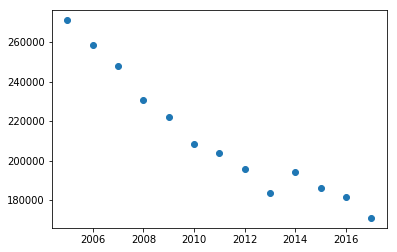

In [30]:
plt.scatter(year_df['Year'], year_df['Noc'])

In [31]:
year_df.describe()

Year            Noc  Men  Women
count    13.00000      13.000000  0.0    0.0
mean   2011.00000  211945.076923  NaN    NaN
std       3.89444   31770.782987  NaN    NaN
min    2005.00000  170993.000000  NaN    NaN
25%    2008.00000  186189.000000  NaN    NaN
50%    2011.00000  203950.000000  NaN    NaN
75%    2014.00000  230905.000000  NaN    NaN
max    2017.00000  271017.000000  NaN    NaN

In [32]:
#2005 5211
#2017 3288

In [33]:
len(Vel_df)

2177205

In [34]:
len(Acc_df)

2047256

In [35]:
Acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
Accident_Index                                 object
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OS

In [36]:
Acc_df['Year'].value_counts()

2005    198735
2006    189161
2007    182115
2008    170591
2009    163554
2010    154414
2011    151474
2014    146322
2012    145571
2015    140056
2013    138660
2016    136621
2017    129982
Name: Year, dtype: int64

In [37]:
#Vel_df['Make'].value_counts()
#drop_list = [Vel_df.make.value_counts().lt(1000)]
#loans_2007 = Vel_df.drop(drop_list,axis=1)


#Vel_df.drop(Vel_df.make.value_counts().gt(1000))


In [38]:
Vel_df.make.value_counts().tail()

KAWASAKI            15436
DAF TRUCKS          13114
PIAGGIO             11400
LONDON TAXIS INT    10306
MAN                 10095
Name: make, dtype: int64

In [40]:
Vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
Accident_Index                      object
Age_Band_of_Driver                  object
Age_of_Vehicle                      float64
Driver_Home_Area_Type               object
Driver_IMD_Decile                   float64
Engine_Capacity_.CC.                float64
Hit_Object_in_Carriageway           object
Hit_Object_off_Carriageway          object
Journey_Purpose_of_Driver           object
Junction_Location                   object
make                                object
model                               object
Propulsion_Code                     object
Sex_of_Driver                       object
Skidding_and_Overturning            object
Towing_and_Articulation             object
Vehicle_Leaving_Carriageway         object
Vehicle_Location.Restricted_Lane    float64
Vehicle_Manoeuvre                   object
Vehicle_Reference                   int64
Vehicle_Type            

In [44]:
Vel_df['model'].value_counts()

MISSING                           11877
CLIO DYNAMIQUE 16V                 8193
PUNTO ACTIVE                       5348
TRANSIT 350 LWB TD                 4529
KA                                 4489
206 LX                             4253
PUNTO ACTIVE 8V                    4115
SPRINTER 313 CDI                   3773
206 LOOK                           3352
KA STYLE                           3349
FIESTA ZETEC                       3345
MINI COOPER                        3134
FIESTA STYLE                       2995
TRANSIT 280 SWB TD                 2938
CORSA COMFORT 16V                  2923
106 XN ZEST 2                      2923
206 S                              2829
YBR 125                            2748
CLIO EXPRESSION 16V                2728
FIESTA ZETEC CLIMATE               2653
SPRINTER 311 CDI LWB               2597
ASTRA CLUB 8V                      2594
ASTRA LS DTI                       2593
CORSA CLUB 12V                     2585
JAZZ SE                            2564
